# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель проекта:**

<div class="alert alert-info">Определить, какие параметры влияют на рыночную стоимость объектов недвижимости. Изучить все закономерности.  Полученные результаты будут использованы в дальнейшем для построения автоматизированной системы.</div> 



### Загрузка данных и изучение общей информации 

In [1]:
import pandas as pd #главная библиотека для анализа данных
import matplotlib.pyplot as plt #библиотека для построения графиков
import datetime as dt #библиотека для работы с датами
import seaborn as sns #будем ее использовать для построения красивой диаграммы рассеяния

In [2]:
#читаем файл и записываем его в датафрейм
data = pd.read_csv('/datasets/real_estate_data.csv')

*Выведем на экран первые 10 строк*

In [3]:
#указываем разделитель
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#выводим для проверки первые 10 строк
display(data.head(15))                

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


*Есть пропуски как в столбцах, добавленных пользователем, так и полученных автоматически - картографических. В некоторых столбцах, на мой взгляд, нужно поменять тип данных (например, days_exposition)*

In [4]:
#посмотрим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*В таблице 23699 строк и 22 столбца. Почти половина из них содержит пропуски. Также есть несоответствия типов данных. С этим нужно будет поработать.*

In [5]:
#оценим первоначальное количество строк, чтобы после предобработки данных посчитать долю удаленных строк
data.shape

(23699, 22)

*Построим гистограмму по всем числовым столбцам датасета*

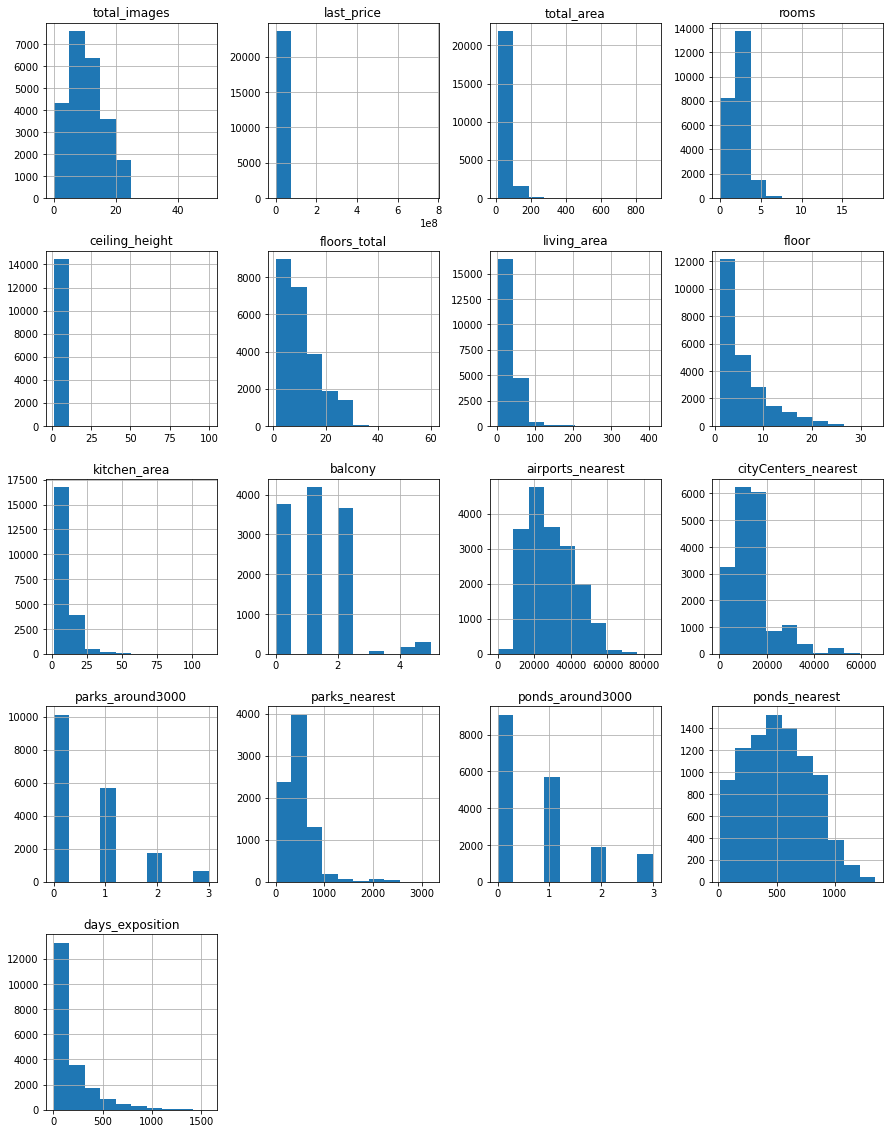

In [6]:
data.hist(figsize=(15, 20));

<div class="alert alert-info">
Выводы на основе первого знакомства с данными:

1) В датафрейме 23699 строк*

2) Пропуски присутствуют в столбцах, как заполняемых вручную пользователем: floors_total (количество этажей в доме), living_area (жилая площадь в метрах), is_apartment (столбец-признак апартаментов), kitchen_area (площадь кухни), balcony (число балконов), floors_total (количество этажей в доме, но пропусков тут немного), locality_name (название населенного пункта), так и определяемых системой автоматически: airports_nearest (расстояние до ближайшего аэропорта), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км), parks_nearest (расстояние до ближайшего парка), ponds_around3000 (число водоемов  в радиусе 3 км), ponds_nearest (расстояние до ближайшего парка), days_exposition (количество дней размещения объявления). 

Для принятия решения о том, нужно ли что-то из них заполнять или удалять, проверим долю этим пропусков и характер данных.

3) Нужно будет поменять тип данных в столбцах days_exposition, balcony, is_apartment, floors_total
    </div>

### Предобработка данных

#### Удаление пропусков

*Выведем общее количество пропусков по столбцам*

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Столбец is_apartment**

*В столбце is_apartment хранится признак апартаментов. Апартаменты появились в России сравнительно недавно, поэтому скорее всего если пользователь данное поле не заполняет, то квартира просто не относится к апартаментам.* 

In [8]:
#выведем перечень уникальных значений столбца is_apartment
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

*Пропуски в столбце заполним значением False (квартира не относится к апартаментам)*

In [9]:
#заполним пропуски в столбце значением False 
data['is_apartment'] = data['is_apartment'].fillna(False)

*Проверяем результат*

In [10]:
#проверяем, что все заполнилось, больше нет значения NaN
print(data['is_apartment'].unique())
data['is_apartment'].isnull().sum()

[False  True]


0

**Столбец balcony**

*В столбце balcony находится информация о количестве балконов в доме. Пропуски в этом поле связаны скорее всего с тем, что у квартиры просто нет балкона. Если балкон отсутствует, пользователь не заполняет это поле. Проверим, что в поле содержится точно количество балконов, а не признак его наличия.*  

In [11]:
#выведем перечень уникальных значений столбца balcony
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

*В столбце указывается количество балконов. Считаю, что NaN можно заполнить значением 0 (у квартиры нет балкона)*

In [12]:
#заполним пропуски в столбце значением 0 
data['balcony'] = data['balcony'].fillna(0)


In [13]:
#проверим, что все заполнилось, значения NaN больше нет
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

**Столбец ceiling_height**

*В столбце находится информация о высоте потолков. Как правило, в домах одной типовой застройки (хрущевки, сталинки и т.п.) высота потолков примерно одинаковая. Поэтому этот столбец можно заполнить средним значением. Но для начала нужно сгруппировать данные так, чтобы можно было получить группы домов одной типовой застройки. Столбца с годом строительства дома у нас нет. Поэтому по годам разбить данные не получится.* 
*По высоте потолка квартиры разделяются на так называемые "сталинки" (около 3 метров), "хрущевки" (в пределах 2,5 м) и более современные дома, начиная с "брежневок" (в районе 2,7 м). Еще имеет смысл выделить в отдельную группу современные дома бизнес-класса, в них, как правило, высота потолка от 2,8 до 3 м.*

*Основные характеристики "сталинок":*

*Как правило, от 2 комнат (1-комнатные встречаются очень редко)*

*Кухня - от 7 кв.м.*

*Общая площадь находится в пределах:*

*1-комнатные от 32 до 50 кв.м.*

*2-комнатные от 44 до 66 кв.м.*

*3-комнатные от 57 до 85 кв.м.*

*4-комнатные от 80 до 110 кв.м.*

*Высота потолка - 3 м.*

*Основные характеристики "хрущевок" такие:*

*5 этажей в доме*

*Кухня - до 6 кв.м., не больше*

*Количество комнат - до 4 (4-комнатные встречаются, но очень редко)*

*Общая площадь находится в пределах:*

*1-комнатные от 28 до 33 кв.м.*

*2-комнатные от 38 до 46 кв.м.*

*3-комнатные от 48 до 58 кв.м.*

*Высота потолка - 2.5 метров*


*Основные характеристики современных домов:*

*От 8 этажей в доме*

*Кухня - от 9 кв.м.*

*Высота потолка - 2.7 м.*

*Отличительные особенности квартир бизнес-класса:*

*Кухня - от 12 кв.м.*

*Площадь 1-комнатной квартиры начинается от 40 кв.м.*

*Высота потолка - 3 м.*

In [14]:
#просмотрим уникальные значения в этом столбце
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

*Помимо NaN здесь присутствуют аномальные значения: 32., 25., 27., 24., 26., 20., 100. Скорее всего они появились вследствии опечатки, пользователь не там поставил запятую, то есть 32. соответствует 3.2 и т.д. Это нужно исправить. А вот выбивающееся значение в 100 и 1 метр я бы удалила*

In [15]:
#выбираем строки с аномальными значениями, присваиваем новое:
data.loc[data['ceiling_height'] == 32, 'ceiling_height'] = 3.2
data.loc[data['ceiling_height'] == 25, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height'] == 24, 'ceiling_height'] = 2.4
data.loc[data['ceiling_height'] == 27, 'ceiling_height'] = 2.7
data.loc[data['ceiling_height'] == 26, 'ceiling_height'] = 2.6
data.loc[data['ceiling_height'] == 20, 'ceiling_height'] = 2.0
data.loc[data['ceiling_height'] == 27.5, 'ceiling_height'] = 2.75
data.loc[data['ceiling_height'] == 22.6, 'ceiling_height'] = 2.26


In [16]:
#посмотрим, сколько строк с аномальным значением в 100 м и 1 м:
print(len(data.query('ceiling_height == 100.')) / len(data))
print(len(data.query('ceiling_height == 1.')) / len(data)) 

4.2195873243596775e-05
4.2195873243596775e-05


*Количество таких строк небольшое, можно спокойно удалить*

In [17]:
#удаляем из датасета строки с аномальными значениями
data = data.loc[(data['ceiling_height'] != 100.) & (data['ceiling_height'] != 1.)]


In [18]:
#проверим, что больше аномалий нет:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [19]:
#для того, чтобы заполнить пропуски с группировкой по типу застройки, создадим функцию
#она возвращает категорию дома, исходя из его этажности, площади кухни и общей площади квартиры
#для категории домов бизнес-класса у нас сравнительно мало типичных характеристик, поэтому в отдельный класс можно выделить только 1-комнатные квартиры
#для домов, не попадающих ни в одну из категорий, вернем значение "иное"

def categorize_house(row):

    kitchen = row['kitchen_area']
    floors = row['floors_total']
    rooms = row['rooms']
    area = row['total_area']

    if (kitchen <= 6) and (floors == 5) and ((rooms == 1 and 28 <= area <= 33) | (rooms == 2 and 38 <= area <= 46) | (rooms == 3 and 48 <= area <= 58)):
        return 'хрущевка'

    if (kitchen >= 7) and (floors <= 5) and ((rooms == 1 and 32 <= area <= 50) | (rooms == 2 and 44 <= area <= 66) | (rooms == 3 and 57 <= area <= 85) | (rooms == 4 and 80 <= area <= 110)):
        return 'сталинка'
    
    if (kitchen >= 9) and (floors >= 8):
        return 'новостройка'
    
    if (kitchen >= 12) and (rooms == 1 and area >= 45):
        return 'бизнес'
    return 'иное'



In [20]:
#добавим новый столбец, в котором будет храниться категория постройки дома
# применим функцию методом apply()
data['house_category'] = data.apply(categorize_house, axis=1);


In [21]:
#посмотрим, как отработала функция на первых 20 строках датасета
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,house_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,новостройка
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,новостройка
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,сталинка
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,иное
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,новостройка
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,новостройка
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,новостройка
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,новостройка
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,иное
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,иное


*Функция отработала корректно. Теперь можно заполнять пропуски. Для хрущевок заполним высоту потолка значением 2.5; для сталинок - 3.0; для новостроек - 2.7, для бизнеса - 3.0, а вот для домов категории "иное" точной информации о высоте потолка у нас нет, поэтому заполним значение медианным по данной группе, чтобы избежать искажения из-за выбросов*

In [22]:
data.loc[(data['house_category'] == 'хрущевка') & (data['ceiling_height'].isna()), 'ceiling_height'] = 2.5;
data.loc[(data['house_category'] == 'сталинка') & (data['ceiling_height'].isna()), 'ceiling_height'] = 3.0;
data.loc[(data['house_category'] == 'новостройка') & (data['ceiling_height'].isna()), 'ceiling_height'] = 2.7;
data.loc[(data['house_category'] == 'бизнес') & (data['ceiling_height'].isna()), 'ceiling_height'] = 3.0;
data.loc[(data['house_category'] == 'иное') & (data['ceiling_height'].isna()), 'ceiling_height'] = round(data.loc[(data['house_category'] == 'иное'), 'ceiling_height'].median(), 1);

In [23]:
#проверим, что все пропуски заполнились
data['ceiling_height'].isnull().sum()

0

**Столбец kitchen_area**

*Площадь кухни так же связана с типом постройки дома. Поэтому заполнять пропуски будем так же, исходя из значения в столбце категории постройки дома. Для того, чтобы определиться, использовать среднее или медиану, посмотрим на уникальные значения в этом столбце*  

In [24]:
data['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

*Здесь также присутствуют аномальные значения в 50, 100 квадратных метров. Они могут помешать при заполнении пропусков. Посмотрим, какую долю они составляют, на мой взгляд, значение площади кухни в 50 кв.м. уже можно считать аномальным, даже в частных домах таких больших кухонь, как правило, не бывает*

In [25]:
print(len(data.query('kitchen_area >= 50.')) / len(data))

0.0024475672025994853


*Доля таких значений всего 0.2 %. Думаю, что нужно от них избавиться. Перезаписывать их, разделяя на 10, не будем, поскольку значений больше 20, довольно много.*

In [26]:
#удаляем из датасета строки с аномальными значениями - кухня больше 50 кв.м.
data = data.loc[data['kitchen_area'] < 50.]

*Теперь займемся пропусками. Разброс значений довольно большой, поэтому будем использовать медианное значение для каждой категории постройки дома*

In [27]:
for i in data['house_category'].unique():
    data.loc[(data['house_category'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = round(data.loc[(data['house_category'] == i), 'kitchen_area'].median(), 1)

*Проверяем, что получилось. Сначала проверим, какие медианные значения площади кухни получились в каждом типе домов:*

In [28]:
data.loc[(data['house_category'] == 'бизнес'),'kitchen_area'].median()

15.149999999999999

In [29]:
data.loc[(data['house_category'] == 'хрущевка'),'kitchen_area'].median()

5.6

In [30]:
data.loc[(data['house_category'] == 'сталинка'),'kitchen_area'].median()

8.9

In [31]:
data.loc[(data['house_category'] == 'новостройка'),'kitchen_area'].median()

11.3

In [32]:
data.loc[(data['house_category'] == 'иное'),'kitchen_area'].median()

7.6

*Медианные значения площади кухни вполне реалистичны. Теперь проверим, что пропусков в этом столбце больше нет:*

In [33]:
#проверим, что все пропуски заполнились
data['kitchen_area'].isnull().sum()

0

*Пропуски в столбцах с картографическими данными не заполняем. Оставляем их, как есть, так как заполнение средним значением может привести к искажениям в данных.*

*В столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest содержится довольно специфическая, на мой взгляд, информация. Она точно не первостепенна при покупке квартиры, поэтому заполнять пропуски в этих столбцах не будем.*

**Столбец days_exposition**

*В столбце days_exposition хранится информация о том, сколько дней было размещено объявление. Если оно пустое, то скорее всего на момент выгрузки данных эта квартира не была продана. Поэтому заполнение пропусков в этом поле может привести к тому, что мы неправильно проанализируем данные. Пропуск в данном столбце будем интерпретировать отсутствием продажи.*

**Столбец living_area**

*Пропуски в этом столбце заполнять нецелесообразно, поскольку при имеющемся наборе данных получить реалистичные значения не представляется возможным. Можно вычесть площадь кухни из общей площади, но при отсутствии площади санузлов и коридоров это значение будет сильно завышено*

#### Изменение типов данных

**Столбец balcony**

In [34]:
#теперь можно изменить его тип с вещественного на целый, так как 1.5 балконов не бывает
data['balcony'] = data['balcony'].astype('int')
#проверяем, что все получилось
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

**Столбец as_apartment**

Столбец as_apartment - это признак того, что объект является апартаментами. Соответственно, для этого столбца просится булев тип данных. Мы заполнили пропуски в нем на предыдущем этапе, значит можно менять тип.

In [35]:
data['is_apartment'] = data['is_apartment'].astype('bool')

**Столбец floors_total**

*В столбце floors_total указывается количество этажей в доме. Это целочисленная величина, так как 1,5 этажей быть не может. Его нужно привести к целому типу int. Однако сперва удалить пропуски (NaN), чтобы при изменении типа не получить ошибку. Пропусков в этом столбце всего 86, что составляет 0.4% от общего объема данных, поэтому такие строки можно удалить.*

In [36]:
#удаляем пропуски
data = data.dropna(subset = ['floors_total'])

In [37]:
#меняем тип данных в столбце
data['floors_total'] = data['floors_total'].astype('int')

In [38]:
#посмотрим теперь на значения столбца
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
        2, 10,  7, 15,  8, 22, 13, 20, 28, 36, 21, 35, 60,  1, 29, 33, 52,
       37])

Проверим, что все отработало корректно, выведем общую информацию о датафрейме:

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21322 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21322 non-null  int64  
 1   last_price            21322 non-null  float64
 2   total_area            21322 non-null  float64
 3   first_day_exposition  21322 non-null  object 
 4   rooms                 21322 non-null  int64  
 5   ceiling_height        21322 non-null  float64
 6   floors_total          21322 non-null  int64  
 7   living_area           20885 non-null  float64
 8   floor                 21322 non-null  int64  
 9   is_apartment          21322 non-null  bool   
 10  studio                21322 non-null  bool   
 11  open_plan             21322 non-null  bool   
 12  kitchen_area          21322 non-null  float64
 13  balcony               21322 non-null  int64  
 14  locality_name         21283 non-null  object 
 15  airports_nearest   

#### Поиск и удаление аномальных значений в столбцах без пропусков

*Проверим, какие значения хранятся в столбцах, в которых отсутствовали пропуски. Их мы не проверяли на наличие аномалий.*

In [40]:
data['total_images'].unique()

array([20,  7, 10,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15, 17,
       14,  0, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [41]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ..., 21400000.,  9470000.,
       11475000.])

In [42]:
data['last_price'].min()

12190.0

In [43]:
data['last_price'].max()

401300000.0

*Стоимость выше 400 миллионов, конечно, немаленькая, но имеет место на рынке недвижимости. Аномалией считать не будем*

In [44]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [45]:
data['total_area'].min()

14.0

In [46]:
data['total_area'].max()

631.2

In [47]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6, 11,  7,  8, 14, 10,  9, 19, 16])

In [48]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
        2, 10,  7, 15,  8, 22, 13, 20, 28, 36, 21, 35, 60,  1, 29, 33, 52,
       37])

In [49]:
data['floor'].unique()

array([ 8,  1,  4, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15,  9, 18, 10, 19,
       20, 27, 16, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [50]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [51]:
data['living_area'].min()

2.0

*А вот это значение никак не увязывается с действительностью. Не может жилая площадь быть равна 2 кв.м. Считаю, что это значение нужно удалить из датасета. Проверим, сколько в выборке квартир с жилой площадью менее 5 кв.м. (все, что меньше 5, на мой взгляд, является аномальным значением):*

In [52]:
print(len(data.query('living_area == 2.0')) / len(data))

4.689991558015196e-05


*Доля таких объектов очень маленькая, поэтому можем смело удалить их*

In [53]:
#удаляем из датасета строки с аномальными значениями - жилая площадь составляет 2 кв.м.
data = data.loc[data['living_area'] > 2.0]

In [54]:
data['living_area'].max()

347.5

In [55]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [56]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  1., nan,  3.])

*В целом, по всем столбцам удалось избавиться от аномалий.* 
*Картографические расстояния оставим без проверки. Их значения могут сильно варьироваться, определить, какое из них аномальное, довольно сложно.*

#### Поиск и удаление дубликатов

*Проверим столбец locality_name на наличие неявных дубликатов.*

In [57]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

*В столбце есть неявные дубликаты, связанные с использованием буквы е или ё: 'посёлок Бугры', 'поселок Бугры', например. Нужно заменить все ё на е*

In [58]:
#создадим функцию, которая будет менять ё на е в столбце с названиями населенных пунктов 

def replace_locality_name(row):
    str1 = str(row['locality_name'])
    if str1.find('ё') >= 0:
        str1 = str1.replace('ё', 'е')
    return str1
    

In [59]:
#применяем функцию к датафрейму и перезаписываем значение столбца locality_name
data['locality_name'] = data.apply(replace_locality_name, axis=1)

In [60]:
#проверим, что все поменялось:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'поселок Новый Св

*От неявных дубликатов избавились. Теперь посчитаем количество явных дубликатов*

In [61]:
#метод duplicated() ищет дубликаты, а sum() их посчитает:

data.duplicated().sum()

0

*Дубликатов в датасете нет.*

In [62]:
#оценим потери после предобработки данных:
data.shape

(20884, 23)

*20884 строк против 23699 в первоначальном виде, датасет потерял в общей сложности 11.9% данных*

<div class="alert alert-info">
Выполнена полная предобработка данных. Заполнены пропуски в столбцах balcony, is_apartment. Пропуски в столбцах ceiling_height, kitchen_area заполнены, исходя из типовой постройки дома. Пропуски в столбцах airports_nearest, cityCenters_nearest заполнены средним значением по данному населенному пункту, но частично.
    
Изменены типы данных в столбцах is_apartment, balcony, floors_total.
Осуществлена проверка на наличие аномальных значений, найденные значения частично заменены. Там, где логически изменить аномалии невозможно, данные были удалены с предварительной оценкой их доли в выборке.
    
Удалены неявные дубликаты в названиях населенного пункта. 
Можно приступать к исследовательскому анализу данных.</div>
    

### Добавление новых столбцов

#### Добавление столбца с ценой за 1 кв.м.

*Стоимость 1 кв.м. рассчитаем по формуле: стоимость квартиры / общая площадь.*

In [63]:
#добавим новый столбец, результат деления округлим до 2 цифр после запятой
#в total_area нет нулевых значений, как мы выяснили до этого, поэтому можно делить без обработки исключений
data['price_1sm'] = round(data['last_price'] / data['total_area'], 2)

#### Добавление столбца с днем недели, месяцем и годом публикации объявления


In [64]:
#предварительно преобразуем столбец first_day_exposition из строки в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#создаем новые столбцы и записываем в них данные
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [65]:
#проверим, что все ок
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.70            11         18.6      1         False  ...   
2            3.00             5         34.3      4         False  ...   
4            3.03            14         32.0     13         False  ...   
5            2.70            12         14.4      5         False  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0     

#### Добавление столбца с типом этажа дома

*Категоризируем наши данные по этажам. Создадим столбец floor_type, который будет хранить значение "первый" в случае первого этажа, "последний" - если квартира на самом верхнем этаже и "другой" - для промежуточных этажей. Значения присвоим с помощью функции*

In [66]:
def floor_range(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [67]:
data['floor_type'] = data.apply(floor_range, axis = 1)

In [68]:
#проверим, что все ок
print(data['floors_total'].head(5), data['floor'].head(5), data['floor_type'].head(5))

0    16
1    11
2     5
4    14
5    12
Name: floors_total, dtype: int64 0     8
1     1
2     4
4    13
5     5
Name: floor, dtype: int64 0    другой
1    первый
2    другой
4    другой
5    другой
Name: floor_type, dtype: object


#### Добавление столбца с расстоянием до центра в км.

*Для получения значений разделим столбец cityCenters_nearest на 1000 и округлим полученный результат до целого значения*

In [69]:
data['city_center_km'] = round(data['cityCenters_nearest'] / 1000)

In [70]:
#проверим, что все ок
print(data['cityCenters_nearest'].head(5), data['city_center_km'].head(5))

0    16028.0
1    18603.0
2    13933.0
4     8098.0
5        NaN
Name: cityCenters_nearest, dtype: float64 0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: city_center_km, dtype: float64


<div class="alert alert-info">В датасет добавлен столбец с типом этажа, а также год, месяц, день размещения объявления, расстояние до центра города в километрах. Это дополнительные параметры, которые могут оказывать влияние на рыночную стоимость квартир.</div>

### Исследовательский анализ данных

#### Исследование параметра "Общая площадь"

*Для начала построим гистограмму значений общей площади*

<AxesSubplot:ylabel='Frequency'>

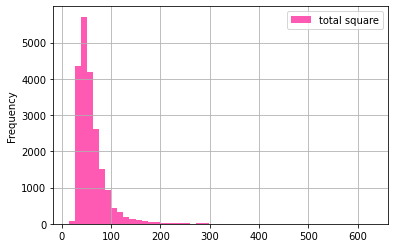

In [71]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='total_area',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='total square',
     grid=True,    
    legend=True,
    color='deeppink'
) 

*По внешнему виду гистограмма схожа с нормальным распределением. По графику видно, что чаще всего объекты недвижимости имеют площадь в пределах от 40 до 60 кв.м. Квартир с площадью более 260 кв.м. практически нет, так же как квартир с площадью менее 20 кв.м.* 

*Проанализируем описание выборки по общей площади:*

In [72]:
data['total_area'].describe()

count    20884.000000
mean        60.068471
std         32.451128
min         14.000000
25%         40.400000
50%         52.000000
75%         69.825000
max        631.200000
Name: total_area, dtype: float64

*Средняя общая площадь - 59 кв.м, медианное значение - 52 кв.м., минимум - 14 кв.м., максимум - 631.2, стандартное отклонение составляет 30. Межквартильный размах выборки: от 40.2 до 68.7 кв.м.*

#### Исследование параметра "Жилая площадь"

*Построим гистограмму значений жилой площади*

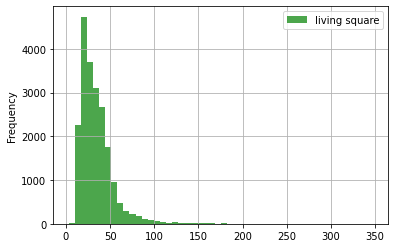

In [73]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='living_area',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='living square',
     grid=True,    
    legend=True,
    color='green'
);

*Гистограмма имеет 2 пика приблизительно в 20 и 40 кв.м., но по форме оно также близко к нормальному распределению*

*Проанализируем описание выборки по жилой площади:*

In [74]:
data['living_area'].describe()

count    20884.000000
mean        34.433016
std         21.004747
min          3.000000
25%         18.800000
50%         30.000000
75%         42.485000
max        347.500000
Name: living_area, dtype: float64

*Межквартильный размах выборки по жилой площади: от 18.7 до 42 кв.м., медианное значение - 50 кв.м., стандартное отклонение составляет 19.8 кв.м., минимум - 3 кв.м. (c ним мы уже поработали до этого, дальнейшее удаление данных уже критично), максимум - 347.5*

#### Исследование параметра "Площадь кухни"

*Построим гистограмму по столбцу kitchen_area, чтобы проанализировать характер распределения значений площади кухни в датасете.*

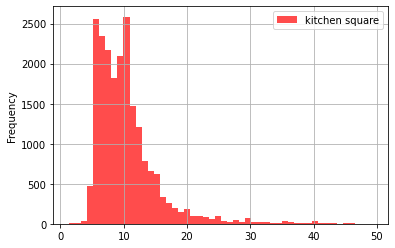

In [75]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='kitchen_area',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='kitchen square',
     grid=True,    
    legend=True,
    color='red'
);

*На гистограмме выделяется сразу несколько пиков, возможно, на характере распределения сказалось заполнение пропусков. Наиболее часто втречаются квартиры с площадью кухни в 6 кв.м. и 10,5 кв.м., что вполне объяснимо, так как 6 кв.м. - это некий стандарт "хрущевок"*

*Рассмотрим описание выборки по площади кухни:*

In [76]:
data['kitchen_area'].describe()

count    20884.000000
mean        10.370253
std          5.112680
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         49.400000
Name: kitchen_area, dtype: float64

*Межквартильный размах выборки: от 7 до 11.7 кв.м., минимум - 1.3, максимум - 29.9, медиана - 9 кв.м. Стандартное отклонение - 4 кв.м. В целом, данные никак не выбиваются от реальных.*

#### Исследование параметра "Цена объекта"

*Построим гистограмму по цене объектов недвижимости. Построенная гистограмма при первом знакомстве с данными показала сильный разброс в значениях цены, поэтому дополнительно укажем ранжирование, чтобы график стал более детальным*

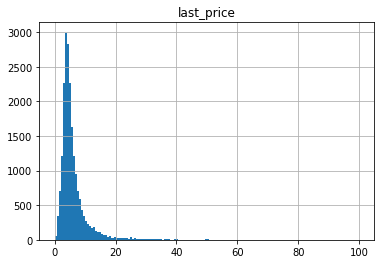

In [77]:
#используем plot, чтобы указать доп.настройки
data['last_price'] = data['last_price'] / 1000000 #разделим цену в столбце, чтобы на выходе были более понятные цифры
data.hist('last_price', range = (0, 100), bins = 150);

*Для построения гистограммы мы указали пределы значений, чтобы получить более детальную картинку. Но характер распределения соответствует нормальному.Чаще всего квартиры продают по стоимости в районе 6.000.000 рублей*

*Получим описание выборки по цене объектов недвижимости:*

In [78]:
data['last_price'].describe()

count    20884.000000
mean         6.352626
std          8.437724
min          0.012190
25%          3.500000
50%          4.690000
75%          6.765044
max        401.300000
Name: last_price, dtype: float64

*Межквартильный размах выборки - от 3.500.000 до 6.765.044 рублей. Медианное значение - 4.690.000. Минимальная стоимость - 12 190, максимальная - 401.300.000 рублей. Стандартное отклонение составляет 8.437.724, что свидетельствует о сильном разбросе стоимости объектов*

#### Исследование параметра "Количество комнат"

*Построим гистограмму по количеству комнат*

<AxesSubplot:ylabel='Frequency'>

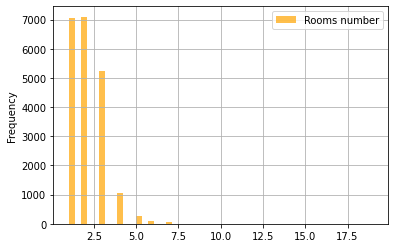

In [79]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='rooms',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='Rooms number',
     grid=True,    
    legend=True,
    color='orange'
)

*Гистограмма имеет вид отдельных пиков, что обосновано характером данных в столбце количества комнат. Наибольшее количество квартир - однокомнатные, двухкомнатные, трехкомнатные. Характер распределения выборки нормальный.*

*Получим описание выборки по количеству комнат:*

In [80]:
data['rooms'].describe()

count    20884.000000
mean         2.090356
std          1.053483
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

*Межквартильный размах - от 1 до 3 комнат, максимум - 19 комнат. Медианное значение - 2 комнаты.*

#### Исследование параметра "Высота потолков"

*Этот столбец мы активно заполняли, поэтому имеет особый смысл посмотреть на распределение значений и характер выборки. Строим гистограмму*

<AxesSubplot:ylabel='Frequency'>

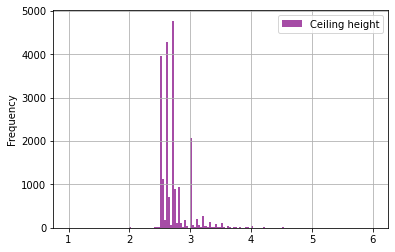

In [81]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=150,
    range = (1.0, 6.0),
    linewidth=5,
    alpha=0.7,
    label='Ceiling height',
     grid=True,    
    legend=True,
    color='purple'
)

*На гистограмме присутствуют отдельные пики около значений в 2.5, 2.6, 2.7 и 3.0, что не противоречит действительности. Это наиболее частое значение высоты потолка в хрущевках, новостройках и сталинских домах.*

*Рассмотрим характерные значения для этой выборки:*

In [82]:
data['ceiling_height'].describe()

count    20884.000000
mean         2.712928
std          0.254587
min          1.200000
25%          2.570000
50%          2.700000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64

*Межквартильный размах у этой выборки от 2.57 до 2.75 (что вполне реалистично). Максимум - 14.0 (с максимальными значениями в этом столбце мы уже поработали)*

#### Исследование параметра "Этаж квартиры"

*Построим гистограмму:*

<AxesSubplot:ylabel='Frequency'>

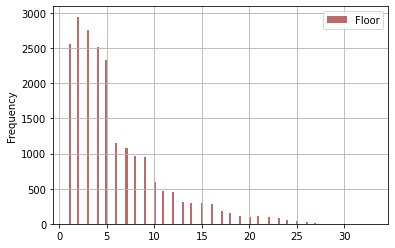

In [83]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='floor',
    bins=150,
    linewidth=5,
    alpha=0.7,
    label='Floor',
     grid=True,    
    legend=True,
    color='brown'
)

*Получили гистограмму с нормальным распределением. Чаще всего объекты расположены на 2 этаже, пиковые значения гистограммы - от 1 до 5 этажей. Квартиры на более высоких этажах встречаются гораздо реже*

*Посмотрим описание:*

In [84]:
data['floor'].describe()

count    20884.000000
mean         5.837244
std          4.815605
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

*Межквартильный размах у нас от 2 до 8 этажа. Медианное значение = 4*

#### Исследование параметра "Тип этажа квартиры"

*Данный столбец мы добавили и заполнили с помощью функции, проверим характер выборки, который получился в итоге:*

In [85]:
#посчитаем количество по каждому из значений
data['floor_type'].value_counts()

другой       15345
последний     2983
первый        2556
Name: floor_type, dtype: int64

<AxesSubplot:>

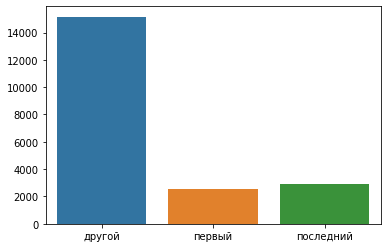

In [86]:
#в столбце нечисловые значения, поэтому гистограмму напрямую построить не удастся
#поскольку значений всего 3, построим столбчатую диаграмму с указанием количества по каждому из типов этажей
floors = data['floor_type'].unique()
frequency = [15156, 2540, 2920]
sns.barplot(x = floors, y = frequency)


*Наибольшую долю среди объектов недвижимости составляют квартиры, находящиеся между первым и последним этажом. Доля квартир на первом этаже самая маленькая.*

#### Исследование параметра "Количество этажей в доме"

*Построим гистограмму*

<AxesSubplot:ylabel='Frequency'>

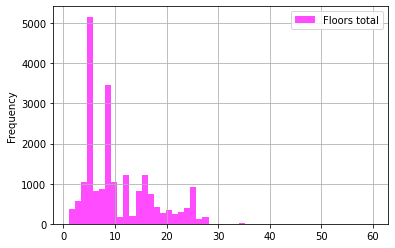

In [87]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='floors_total',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='Floors total',
     grid=True,    
    legend=True,
    color='magenta'
)

*Как показывает гистограмма, чаще всего объекты недвижимости расположены в 5-этажных и 9-этажных домах. Присутствуют также пики с меньшей частотностью у значений в 12, 16, 25 этажей.*

In [88]:
data['floors_total'].describe()

count    20884.000000
mean        10.566319
std          6.522542
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

*Межквартильный размах этой выборки - от 5 до 15 этажей. 9 этажей является медианой. Минимальное значение - 1, максимальное - 60 этажей.*

#### Исследование параметра "Расстояние до центра города в метрах"

*Ознакомимся с характером распределения значений в этом столбце, построим гистограмму:*

<AxesSubplot:ylabel='Frequency'>

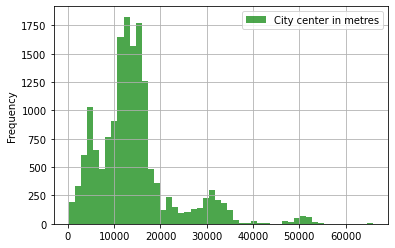

In [89]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='cityCenters_nearest',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='City center in metres',
     grid=True,    
    legend=True,
    color='green'
)

*Общий вид графика близок к нормальному распределению. Имеются пики значений, соответствующие 12000 и 15000 метров. Что может говорить о том, что в выборке чаще встречаются квартиры, расположенные на окраинах городов или соседних с ними населенных пунктах.*

In [90]:
data['cityCenters_nearest'].describe()

count    16237.000000
mean     14256.666810
std       8665.416021
min        181.000000
25%       9380.000000
50%      13114.000000
75%      16268.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

*Межквартильный размах выборки - от 9380 до 16293 метров. Минимальное значение - 181 м., максимальное - 65968 м., медиана - 13114 м.*

#### Исследование параметра "Расстояние до аэропорта в метрах"

*Ознакомимся с характером распределения значений в этом столбце, построим гистограмму:*

<AxesSubplot:ylabel='Frequency'>

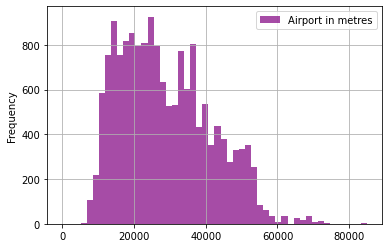

In [91]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='airports_nearest',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='Airport in metres',
     grid=True,    
    legend=True,
    color='purple'
)

*Наиболее часто объекты недвижимости в выборке расположены приблизительно в 16-25 км. от аэропорта. Несмотря на наличие некоторых пиков, в целом график распределения совпадает с нормальным.*

In [92]:
data['airports_nearest'].describe()

count    16216.000000
mean     28783.158300
std      12659.846783
min          0.000000
25%      18506.750000
50%      26711.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64

*Межквартильный размах выборки - от 18507 до 37227 м., минимальное значение в 0 метров настораживает, скорее всего это аномалия.*

#### Исследование параметра "Расстояние до ближайшего парка"

*Изучим распределение значений, постоим гистограмму:*

<AxesSubplot:ylabel='Frequency'>

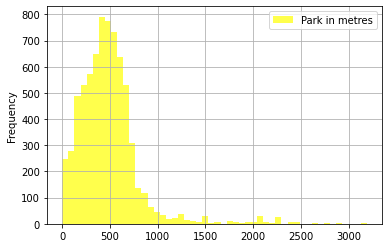

In [93]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='parks_nearest',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='Park in metres',
     grid=True,    
    legend=True,
    color='yellow'
)

*Данные о расстоянии до парка распределены довольно нормально, чаще всего квартиры находятся на расстоянии от 400 до 500 м. от парка (пиковые значения гистограммы)*

In [94]:
data['parks_nearest'].describe()

count    7215.000000
mean      488.171171
std       337.308354
min         1.000000
25%       288.000000
50%       454.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

*Межквартильный размах выборки - от 288 до 610 метров. Минимальное значение - 1м., оно имеет право на существование в реальности, если дом расположен, например, внутри парка.*

#### Исследование параметра "День публикации объявления"

*Проверим, как распределены по выборке значения дня недели публикации объявления. Построим гистограмму:*

<AxesSubplot:ylabel='Frequency'>

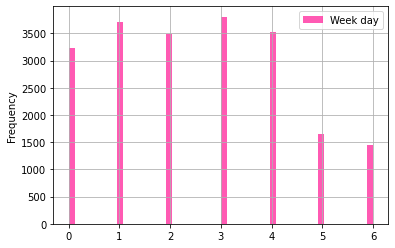

In [95]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='week_day',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='Week day',
     grid=True,    
    legend=True,
    color='deeppink'
)

*По гистограмме видно, что наибольшее количество объявлений о продаже квартир было опубликовано в рабочие дни. В выходные (5-й и 6-й день) количество публикаций заметно меньше*

#### Исследование параметра "Месяц публикации объявления"

<AxesSubplot:ylabel='Frequency'>

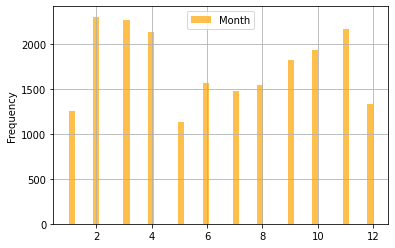

In [96]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='month',
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='Month',
     grid=True,    
    legend=True,
    color='orange'
)

*Наибольшее количество объявлений о продаже публикуется в феврале-апреле, а также с августа по ноябрь. В декабре-январе и в летние месяцы наблюдается спад активности. Скорее всего это связано с новогодними каникулами и сезоном отпусков.*

#### Оценка скорости продажи объектов недвижимости (столбец days_exposition)

*Оценим, как быстро продаются квартиры, построим гистограмму по столбцу days_exposition*

<AxesSubplot:ylabel='Frequency'>

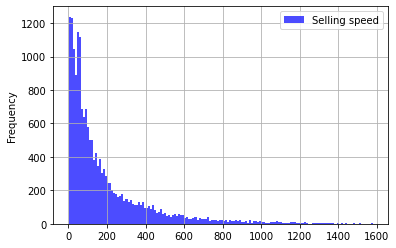

In [97]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='days_exposition',
    bins=150,
    linewidth=5,
    alpha=0.7,
    label='Selling speed',
     grid=True,    
    legend=True,
    color='blue'
)

*Пик гистограммы показывает значение от 0 до 50 дней, это говорит о том, что рынок недвижимости очень активный, чаще всего квартира продается в течении приблизительно 2 месяцев с момента размещения объявления. У гистограммы практически отсутствует "левый ус" - область с маленькими значениями, а вот "правый ус" довольно длинный и тянется практически до 1600 дней. 
Продажа недвижимости - довольно сложный процесс. Сначала нужно организовать просмотр, в случае нахождения покупателей - получить аванс, затем подготовить необходимый пакет документов. На мой взгляд, продажа квартиры в срок до 30 дней можно считать очень быстрой.*

*Рассмотрим более детально описание данной выборки:*

In [98]:
data['days_exposition'].describe()

count    18007.000000
mean       185.454768
std        221.838157
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

*Межквартильный размах выборки - от 45 до 239 дней. 
Можно сделать вывод, что продажа квартиры в срок до 45 дней является быстрой, а свыше 239 дней - необычно долгой. 
У выборки большой разброс данных (стандартное отклонение составляет 221 дней), поэтому более информативно для нас медианное значение - 102 дня (среднее - 185), столько дней в среднем занимает продажа на основе имеющихся данных.*

*Рассмотрим более детально диапазон продаж от 0 до 100 дней*

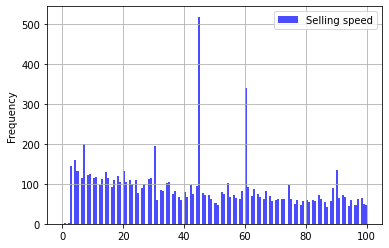

In [99]:
#используем plot, чтобы указать доп.настройки
data.plot(
    kind='hist',
    y='days_exposition',
    bins=150,
    linewidth=5,
    range = (0, 100),
    alpha=0.7,
    label='Selling speed',
     grid=True,    
    legend=True,
    color='blue'
);

*На гистограмме выделяются отдельные пики в 30, 45 и 60 дней.*

#### Оценка зависимости цены квартиры от общей площади, количества комнат и ряда других параметров.

*Оценим зависимость стоимости квартиры от каких параметров, как:*
- общая площадь
- жилая площадь
- площадь кухни
- количество комнат
- этаж, на котором расположена квартиры
- день недели размещения объявления
- месяц размещения объявления
- год размещения объявления

*Построим матрицу корреляции по соответствующим столбцам датасета и вычислим коэффициент корреляции Пирсона. С такими параметрами, как этаж, день, месяц и год, стоимость квартир имеет нелинейную зависимость, поэтому данные столбцы в матрицу включать не будем. По ним построим отдельные графики зависимостей.*

In [100]:
#перечень нужных столбцов записываем в переменную
numeric_col = ['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area']
#с помощью метода corr() находим коэффициент корреляции 
corr = data.loc[:, numeric_col].corr()
#раскрашиваем ячейки для большей наглядности
corr.style.background_gradient(cmap='coolwarm')


,last_price,total_area,rooms,living_area,kitchen_area
last_price,1.000000,0.669177,0.390400,0.595590,0.463484
total_area,0.669177,1.000000,0.780032,0.940173,0.582964
rooms,0.390400,0.780032,1.000000,0.856241,0.252261
living_area,0.595590,0.940173,0.856241,1.000000,0.399459
kitchen_area,0.463484,0.582964,0.252261,0.399459,1.000000


Главную ценность представляет первая строка матрицы. По ней видно, что:
- между ценой и общей площадью сильная линейная связь, коэффициент положительный и близок к 1, значит при увеличении общей площади увеличивается и цена
- количество комнат и цена так же имеют зависимость, но связь умеренная, при увеличении количества комнат цена так же возрастает, но в меньшей степени, чем при увеличении общей площади
- между жилой площадью и ценой имеется сильная линейная связь, при увеличении жилой площади увеличивается и цена
- площадь кухни и цена имеют умеренную линейную связь, при увеличении площади кухни цена увеличивается, но в меньшей степени, чем, к примеру, от общей площади


*Чтобы получить еще более визуальное представление о связи общей площади со стоимостью квартиры построим диаграмму рассеяния:*

Text(0, 0.5, 'Площадь, кв.м.')

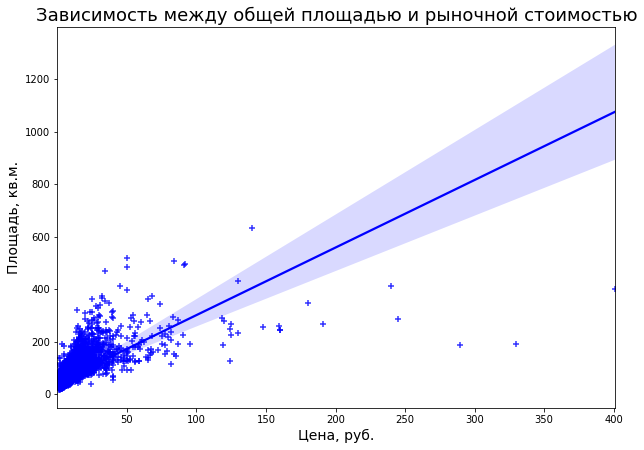

In [101]:
#строим диаграмму рассеяния с помощью библиотеки seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=data['last_price'],y=data['total_area'],color='blue', marker='+')


#Легенда, заголовок и подписи осей
plt.title('Зависимость между общей площадью и рыночной стоимостью', size=18)
plt.xlabel('Цена, руб.', size=14)
plt.ylabel('Площадь, кв.м.', size=14)

*График имеет вид наклонного облака, что говорит о линейной связи. Однако в выборке имеются данные, выбивающиеся из общего тренда - квартиры с высокой стоимостью и маленькой площадью и наоборот. Можно сказать, что для диапазона площади от 0 до 300 кв.м. и цены до 50 000 000 между величинами сильная линейная связь, при выходе из этого диапазона характер связи либо усложняется, возможно, вследствие влияния других факторов, либо в выборке присутствуют выбросы.*

*Зависимость между жилой площадью и стоимостью квартиры в визуальном представлении:*                        

Text(0, 0.5, 'Жилая площадь, кв.м.')

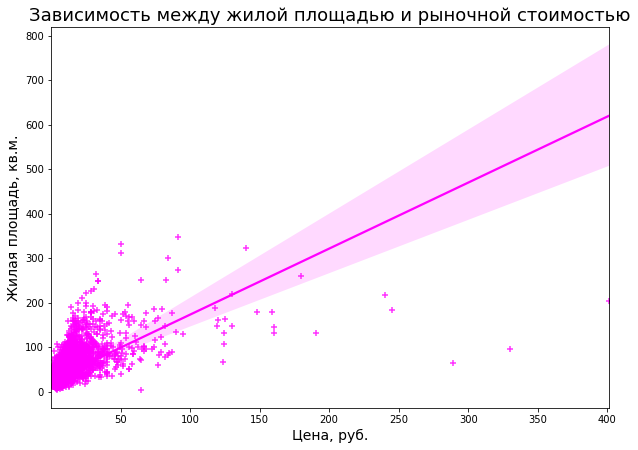

In [102]:
#строим диаграмму рассеяния с помощью библиотеки seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=data['last_price'],y=data['living_area'],color='magenta', marker='+')


#Легенда, заголовок и подписи осей
plt.title('Зависимость между жилой площадью и рыночной стоимостью', size=18)
plt.xlabel('Цена, руб.', size=14)
plt.ylabel('Жилая площадь, кв.м.', size=14)

*Вид диаграммы рассеяния практически повторяет построенную для параметра жилой площади, что вполне логично, так как параметры имеют общую природу.*

Text(0, 0.5, 'Площадь кухни, кв.м.')

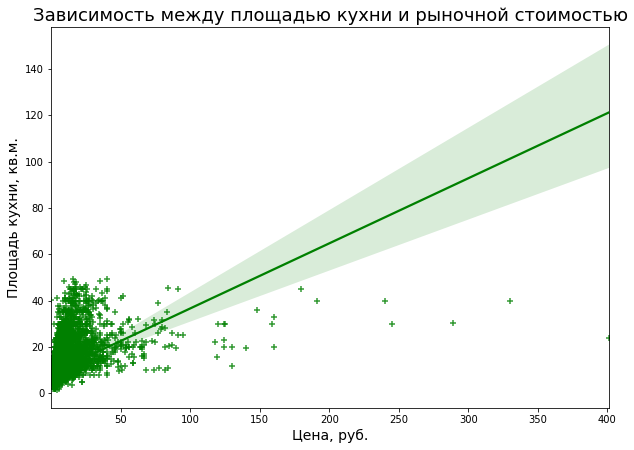

In [103]:
#строим диаграмму рассеяния с помощью библиотеки seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=data['last_price'],y=data['kitchen_area'],color='green', marker='+')


#Легенда, заголовок и подписи осей
plt.title('Зависимость между площадью кухни и рыночной стоимостью', size=18)
plt.xlabel('Цена, руб.', size=14)
plt.ylabel('Площадь кухни, кв.м.', size=14)

*Угол поворота облака чуть меньше, чем у предыдущих параметров. Это подтверждается значением коэффициента корреляции, он ниже. Также видно, что квартиры со стоимостью свыше 50 000 000 практически не зависят от площади кухни, либо это выбросы данных*

Text(0, 0.5, 'Кол-во комнат')

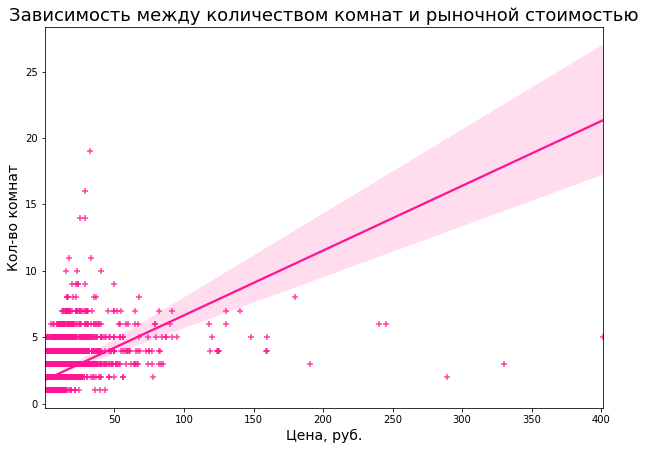

In [104]:
#строим диаграмму рассеяния с помощью библиотеки seaborn
fig = plt.figure(figsize=(10,7))
sns.regplot(x=data['last_price'],y=data['rooms'],color='deeppink', marker='+')


#Легенда, заголовок и подписи осей
plt.title('Зависимость между количеством комнат и рыночной стоимостью', size=18)
plt.xlabel('Цена, руб.', size=14)
plt.ylabel('Кол-во комнат', size=14)

*По графику видно, что при увеличении количества комнат свыше 6 характер зависимости между этими величинами перестает быть линейным и становится более сложным.* 

*Для таких параметров, как этаж расположения квартиры, дата, месяц, год размещения объявления необходимо исследовать нелинейную связь со стоимостью. Попробуем выявить зависимость между этими параметрами, используя построение графиков медианной цены.*

In [105]:
#найдем медианное значение цены по каждому типу этажа, построим сводную таблицу
data_floor = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['median'])
data_floor.columns = ['median_price']
print(data_floor)

            median_price
floor_type              
другой              4.90
первый              3.95
последний           4.35


Text(0, 0.5, 'Цена, млн.руб.')

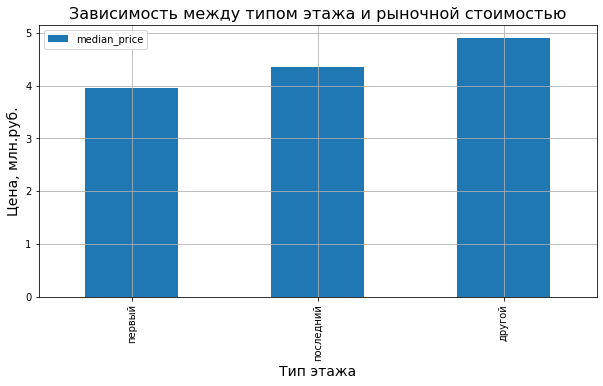

In [106]:
#построим столбчатую диаграмму по данным полученной сводной таблицы 
(
    data_floor
    .sort_values(by = 'median_price')
    .plot(y = 'median_price', kind = 'bar', grid = True, figsize = (10, 5))
)
#Легенда, заголовок и подписи осей
plt.title('Зависимость между типом этажа и рыночной стоимостью', size=16)
plt.xlabel('Тип этажа', size=14)
plt.ylabel('Цена, млн.руб.', size=14)

*Данный график показывает, что квартиры, расположенные на первом и последнем этажах, стоят в среднем меньше. Предельная разница в средней стоимости квартир на первом этаже и средней стоимости квартир, расположенных выше, составляет 950 000 рублей*

In [107]:
#сгруппируем данные по дням недели, найдем медианную цену для каждого из дней с помощью сводной таблицы
data_day = data.pivot_table(index = 'week_day', values = 'last_price', aggfunc = ['median'])
data_day.columns = ['median_price']
print(data_day)

          median_price
week_day              
0             4.700000
1             4.750000
2             4.725142
3             4.700000
4             4.600000
5             4.600000
6             4.570000


Text(0, 0.5, 'Цена, млн.руб.')

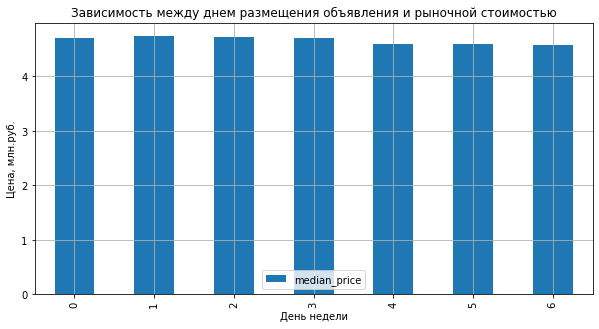

In [108]:
#построим столбчатую диаграмму по данным полученной сводной таблицы 
(
    data_day
    
    .plot(y = 'median_price', kind = 'bar', grid = True, figsize = (10, 5))
)
#Легенда, заголовок и подписи осей
plt.title('Зависимость между днем размещения объявления и рыночной стоимостью', size=12)
plt.xlabel('День недели', size=10)
plt.ylabel('Цена, млн.руб.', size=10)

*Медианные значения цены по каждому из дней недели не сильно отличаются друг от друга, что говорит об отсутствии влияния данного параметра на рыночную стоимость квартиры*

In [109]:
#сгруппируем данные по месяцам, найдем медианную цену для каждого месяца с помощью сводной таблицы
data_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median'])
data_month.columns = ['median_price']
print(data_month)

       median_price
month              
1             4.650
2             4.700
3             4.700
4             4.800
5             4.550
6             4.490
7             4.650
8             4.600
9             4.740
10            4.575
11            4.700
12            4.850


Text(0, 0.5, 'Цена, млн.руб.')

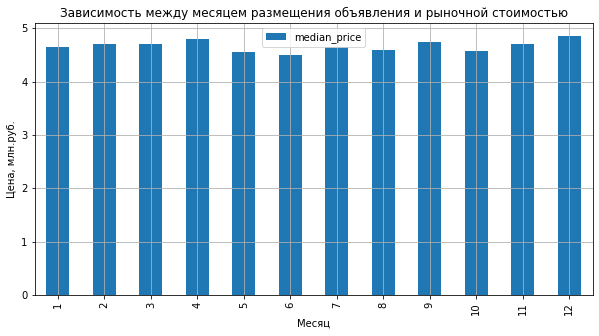

In [110]:
#построим столбчатую диаграмму по данным полученной сводной таблицы 
(
    data_month
    
    .plot(y = 'median_price', kind = 'bar', grid = True, figsize = (10, 5))
)
#Легенда, заголовок и подписи осей
plt.title('Зависимость между месяцем размещения объявления и рыночной стоимостью', size=12)
plt.xlabel('Месяц', size=10)
plt.ylabel('Цена, млн.руб.', size=10)

*Медианные значения цены по каждому месяцу слегка напоминают кривую потребительского спроса с "проседанием" в начале лета и конце осени. Однако разница в значениях цен небольшая, что говорит о слабом влиянии этого параметра на рыночную стоимость квартиры*

In [111]:
#сгруппируем данные по годам, найдем медианную цену для каждого года с помощью сводной таблицы
data_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median'])
data_year.columns = ['median_price']
print(data_year)

      median_price
year              
2014       7.58000
2015       5.24450
2016       4.55000
2017       4.50000
2018       4.62827
2019       5.05000


Text(0, 0.5, 'Цена, млн.руб.')

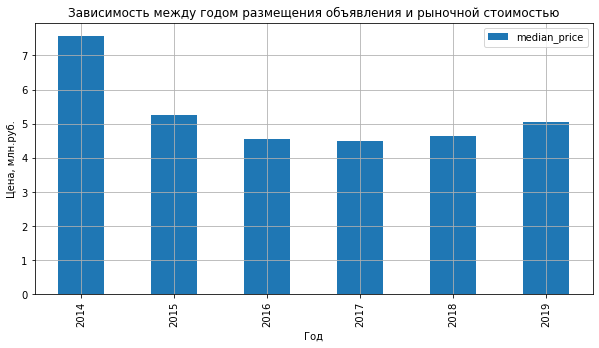

In [112]:
#построим столбчатую диаграмму по данным полученной сводной таблицы 
(
    data_year
    
    .plot(y = 'median_price', kind = 'bar', grid = True, figsize = (10, 5))
)
#Легенда, заголовок и подписи осей
plt.title('Зависимость между годом размещения объявления и рыночной стоимостью', size=12)
plt.xlabel('Год', size=10)
plt.ylabel('Цена, млн.руб.', size=10)

*В выборке присутствуют данные за период с 2014 по 2019 годы. Анализ медианной стоимости квартир показал, что стоимость жилья в 2014 году была самой высокой. Затем произошел резкий спад цен, который продолжался до 2016 года. Начиная с 2017 года стоимость объектов недвижимости повышается в пределах 2-8%.*

#### Населенные пункты с самой высокой и самой низкой стоимостью квадратного метра

*Найдем населенные пункты с наибольшим числом объявлений*

In [113]:
#группируем данные по населенному пункту, вычисляем количество объявлений и среднюю стоимость квадратного метра
data_grouped = data.pivot_table(index = 'locality_name', values = 'price_1sm', aggfunc = ['mean', 'count'])
data_grouped.columns = ['mean_square_price', 'count']
data_grouped['mean_square_price'] = round(data_grouped['mean_square_price'], 1)

#записываем топ 10 в переменную и выводим ее на экран
data_grouped10 = data_grouped.sort_values(by = 'count', ascending = False).head(10)
print(data_grouped10)

                   mean_square_price  count
locality_name                              
Санкт-Петербург             113275.8  13984
поселок Мурино               85364.5    429
поселок Шушары               78393.7    392
Всеволожск                   69029.2    357
Пушкин                      103078.7    332
Колпино                      75226.3    322
Гатчина                      68635.6    290
поселок Парголово            90756.0    288
деревня Кудрово              92248.5    226
Выборг                       58319.4    190


*В таблице выше представлены 10 населенных пунктов с наибольшим количеством объявлений о продаже недвижимости. Лидирует конечно же г. Санкт-Петербург, доля объявлений в нем значительно выше, как и средняя стоимость 1-го квадратного метра.*

In [114]:
#проверяем, что мы не ошиблись выше, выводим населенный пункт с самой высокой стоимостью 1 кв.м.
print(data_grouped10.sort_values(by = 'mean_square_price', ascending = False).head(1))

                 mean_square_price  count
locality_name                            
Санкт-Петербург           113275.8  13984


*Лидером по стоимости 1-го квадратного метра жилья является Санкт-Петербург, средняя цена 1-го квадратного метра здесь составляет 113.275 рублей 80 коп.*

*Посмотрим, в каких населенных пунктах из топ-10 самое дешевое жилье:*

In [115]:
print(data_grouped10.sort_values(by = 'mean_square_price', ascending = True).head(1))

               mean_square_price  count
locality_name                          
Выборг                   58319.4    190


*Самая низкая средняя стоимость за 1 кв.м. обнаружена в г. Выборг, она составляет 58319 рублей 40 коп.*

#### Исследование зависимости расстояния до центра города на рыночную стоимость

*Самый крупный населенный пункт в выборке - г.Санкт-Петербург. Выберем все объявления в нем и посмотрим, как расстояние до центра города влияет на рыночную стоимость квартиры.*

In [116]:
#делаем срез данных по г.Санкт-Петербург
data_piter = data.query('locality_name == "Санкт-Петербург"')
#строим сводную таблицу, в которой считаем среднюю стоимость 1 кв.м. для каждого километра
data_piter = data_piter.pivot_table(index = 'city_center_km', values = 'price_1sm', aggfunc = ['mean'])
data_piter.columns = ['mean_square_price']
#округлим данные для наглядности
data_piter['mean_square_price'] = round(data_piter['mean_square_price'], 1)
print(data_piter.sort_values(by = 'city_center_km'))

                mean_square_price
city_center_km                   
0.0                      238242.8
1.0                      168671.8
2.0                      160150.1
3.0                      119356.7
4.0                      128983.8
5.0                      135142.8
6.0                      145728.7
7.0                      153226.8
8.0                      123766.0
9.0                      112382.6
10.0                     111312.9
11.0                     107908.5
12.0                     107218.7
13.0                     107455.6
14.0                     103490.1
15.0                     104099.6
16.0                     100228.2
17.0                      96810.1
18.0                      96726.6
19.0                      98545.2
20.0                     100863.4
21.0                      90590.2
22.0                      89631.4
23.0                      92304.9
24.0                      84552.5
25.0                      86111.0
26.0                      84614.3
27.0          

<AxesSubplot:ylabel='city_center_km'>

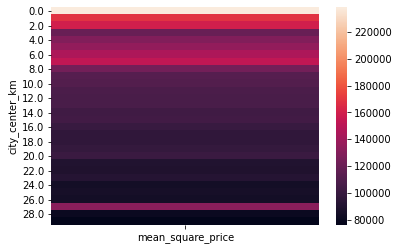

In [117]:
#построим тепловую карту по полученным результатам
sns.heatmap(data_piter)

*В целом, общий тренд полученных результатов говорит о том, что чем ближе к центру расположена квартира, тем выше средняя стоимость 1 кв.метра в ней. Однако присутствуют значения с высокой средней стоимостью 1 кв.м. при сравнительно большой удаленности от центра (к примеру, 27-й километр). Возможно, эти объекты расположены в элитных пригородных поселках.*

*Центром г.Санкт-Петербург нужно, на мой взгляд, считать территорию Центрального района. Она имеет площадь 17 кв.км., то есть приблизительно 0-4 км. являются центром, а начиная с 5-го киломентра центр заканчивается.*


<div class="alert alert-info">Исследовательский анализ данных позволил выявить следующие закономерности.
    
Чаще всего встречаются квартиры с общей площадью от 40 до 60 кв.м., жилой площадью от 20 до 40 кв.м., площадью кухни от 6 до 11 кв.м., 1,2,3-комнатные, с высотой потолка от 2.5 до 2.8 м, расположенные между первым и последним этажами, в 5 и 9-этажных домах, в 12-15 км от центра города, в 16-25 км. от аэропорта, в 400-500 м до ближайшего парка. 
Как правило, объявления размещаются в рабочие дни. Существует также изменение активности продаж по месяцам, схожее с кривой покупательского спроса. 

Чаще всего квартиры продаются в течении первых 2 месяцев с момента размещения объявления. Анализ выборки показал, что быстрой продажей можно считать срок до 45 дней, а необычно долгой - более 239 дней. Медианное значение длительности размещения объявления (продажи) составляет 102 дня.
    
Изучение зависимости рыночной стоимости от разных параметров показало, что общая площадь и цена имеют сильную линейную зависимость, при увеличении площади растет и цена (коэффициент корреляции = 0.7). От параметра "жилая площадь" рыночная стоимость также находится в линейной зависимости (коэффициент корреляции = 0.6). Корреляция цены с площадью кухни чуть меньше и составляет 0.46, это чуть больше, чем параметр "количество комнат" - 0.4.
Удалось также найти нелинейную зависимость рыночной стоимости от таких параметров, как тип этажа. Квартиры на первом этаже и последнем имеют в среднем меньшую стоимость, чем квартиры, расположенные на других этажах. 

Анализ влияния дня и месяца размещения объявления показал, что зависимость рыночной цены от данных параметров слабая.

Зарегистрированы спады и рост цен, в зависимости от года размещения объявления. Скорее всего это связано с общей ситуацией в экономике.

Анализ цен на объекты недвижимости в г.Санкт-Петербурге показал, что в целом стоимость квартиры растет при приближении к центру города. Однако существуют исключения из общего тренда - квартиры с большой стоимостью, отдаленные от центра. Скорее всего они расположены в элитных загородных поселках.
    
Лидером по количеству объявлений среди населенных пунктов является г.Санкт-Петербург. Самая высокая стоимость квадратного метра жилья также зафиксирована в Санкт-Петербурге (113.275 р. за 1 кв.м.), самая низкая - в г. Выборг (58319.4 р. за 1 кв.м.)</div>


### Общий вывод

<div class="alert alert-info"><strong>На основе данных по статистике объявлений о продаже объектов недвижимости был проведен анализ зависимости разных параметров на рыночную стоимость. Результаты исследования будут учтены при построении автоматизированной системы, которая определяет рыночную цену недвижимости.
    Перед исследованием были выдвинуты следующие гипотезы:

Гипотеза 1. Общая площадь, жилая площадь влияет на рыночную стоимость

Гипотеза 2. Площадь кухни влияет на рыночную стоимость

Гипотеза 3. Количество комнат влияет на рыночную стоимость

Гипотеза 4. Тип этажа, на котором расположена квартира, влияет на рыночную стоимость
    
Гипотеза 5. День, месяц и год размещения объявления влияет на рыночную стоимость
    
Гипотеза 6. Расстояние до центра города влияет на рыночную стоимость    

В ходе анализа был изучен каждый из вышеперечисленных параметров, построены гистограммы распределения значений, найдены коэффициенты корреляции с ценой, построены гистограммы медианных значений стоимости. В результате выявлены следующие зависимости:

Гипотеза 1: подтверждена, общая площадь и жилая площадь имеют линейную зависимость с ценой, коэффициент корреляции 0.7 и 0.6 соответственно
    
Гипотеза 2: подтверждена, коэффициент корреляции составляет 0.46, что говорит об умеренной зависимости данного параметра на цену
    
Гипотеза 3: подтверждена, коэффициент корреляции составляет 0.4, что говорит об умеренной зависимости данного параметра на цену
    
Гипотеза 4. подтверждена. Квартиры, расположенные на первом и последнем этажах, стоят ниже, чем квартиры на других этажах
    
Гипотеза 5: не подтверждена. Коэффициенты корреляции и гистограммы медианных значений цены с группировкой по дням недели и месяцам размещения объявления свидетельствуют о слабом влиянии этих параметров на стоимость. Однако выявлен значительный спад и рост цены с разбивкой по годам размещения объявления. Скорее всего изменение цены связано с общей ситуацией в экономике.
    
Гипотеза 6: частично подтверждена. Как правило, чем ближе к центру города расположена квартира, тем дороже она стоит. Однако в выборке присутствуют объекты с большой стоимостью и большим расстоянием от города, выбивающиеся из общего тренда.      

Исследовательский анализ данных также позволил выявить следующие закономерности:
    
Объявления о продаже объектов недвижимости размещаются в основном в рабочие дни, и реже - в выходные. Чаще всего квартиры продаются в первые 2 месяца с момента размещения объявления. 
    
Таким образом, для построения автоматизированной системы можно использовать зависимости из гипотез 1, 2, 3, 4. Необходимо провести дополнительный анализ данных для подтверждения гипотезы 6 на более репрезентативной выборке данных.      
    
</strong></div>